# support vector machines(svm)

In [ ]:
import pandas as pd
data = pd. read_csv('/content/mushroom.csv')
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [ ]:
data.drop(columns = ['Unnamed: 0'] , inplace = True)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

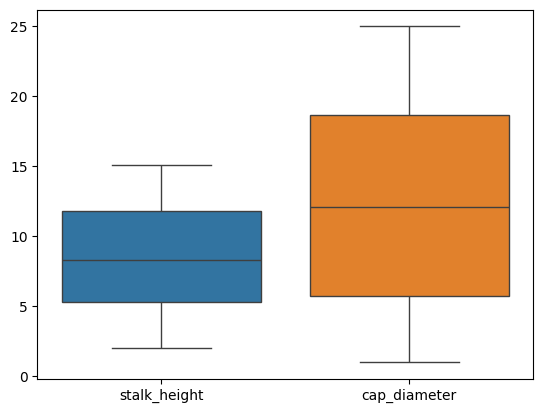

In [ ]:
sns.boxplot(data)

In [ ]:
data.iloc[:,-1:-3].corr()

""


<Axes: xlabel='stalk_height', ylabel='cap_diameter'>

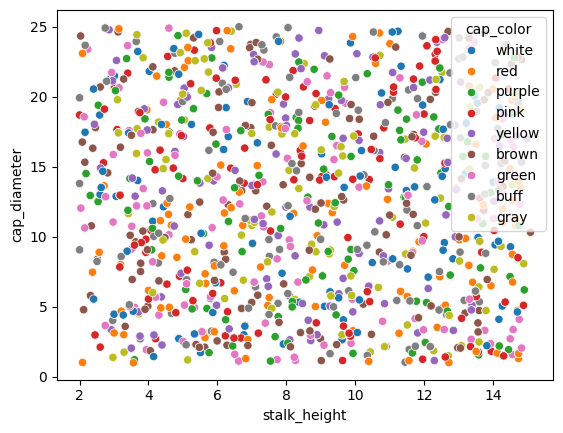

In [ ]:
sns.scatterplot(data, x = 'stalk_height' , y = 'cap_diameter' , c = 'yellow' , hue = 'cap_color')

In [ ]:
corr_data = data.loc[:,['stalk_height','cap_diameter']]

array([[<Axes: title={'center': 'stalk_height'}>,
        <Axes: title={'center': 'cap_diameter'}>]], dtype=object)

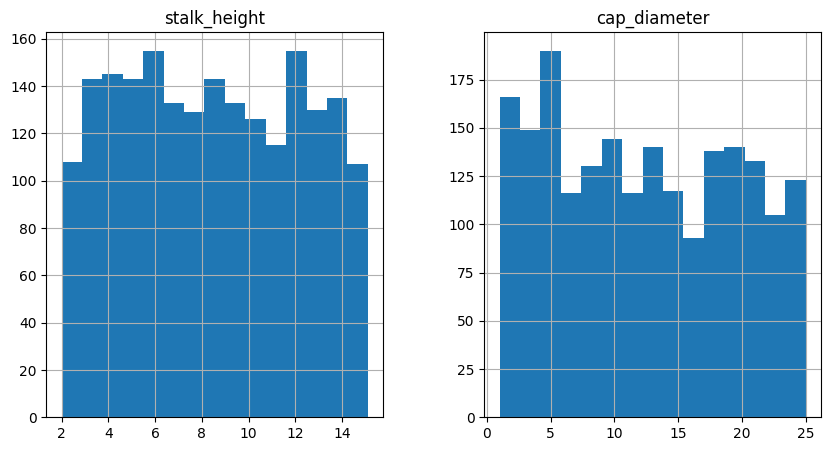

In [ ]:
#import matplotlib.pyplot as plt
data.hist(bins = 15 , figsize = (10,5))

In [ ]:
corr_data

,stalk_height,cap_diameter
0,14.276173,5.054983
1,3.952715,19.068319
2,9.054265,7.205884
3,5.226499,20.932692
4,14.037532,12.545245
...,...,...
1995,5.877891,17.464145
1996,6.500840,13.501957
1997,13.558064,11.270020
1998,11.092703,8.423199


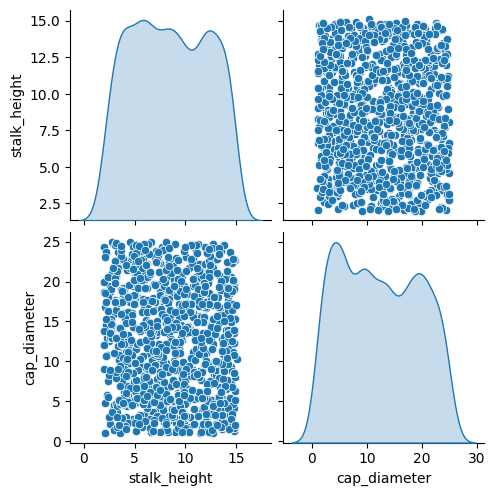

In [ ]:
sns.pairplot(data,diag_kind= 'kde')

In [ ]:
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()
for col in data.columns:
  data[col] = LB.fit_transform(data[col])

data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,916,190
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,128,750
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,537,281
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,234,829
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,895,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,0,1,1,2,6,0,1,1,283,680
1996,4,2,5,1,5,0,2,1,9,1,...,0,2,1,7,8,2,5,1,335,521
1997,2,1,3,1,3,3,0,1,7,1,...,0,0,2,1,8,0,6,1,859,438
1998,0,3,7,0,7,2,0,1,6,0,...,1,3,1,0,1,5,6,1,679,320


array([[<Axes: title={'center': 'cap_shape'}>,
        <Axes: title={'center': 'cap_surface'}>,
        <Axes: title={'center': 'cap_color'}>,
        <Axes: title={'center': 'bruises'}>,
        <Axes: title={'center': 'odor'}>],
       [<Axes: title={'center': 'gill_attachment'}>,
        <Axes: title={'center': 'gill_spacing'}>,
        <Axes: title={'center': 'gill_size'}>,
        <Axes: title={'center': 'gill_color'}>,
        <Axes: title={'center': 'stalk_shape'}>],
       [<Axes: title={'center': 'stalk_root'}>,
        <Axes: title={'center': 'stalk_surface_above_ring'}>,
        <Axes: title={'center': 'stalk_surface_below_ring'}>,
        <Axes: title={'center': 'stalk_color_above_ring'}>,
        <Axes: title={'center': 'stalk_color_below_ring'}>],
       [<Axes: title={'center': 'veil_type'}>,
        <Axes: title={'center': 'veil_color'}>,
        <Axes: title={'center': 'ring_number'}>,
        <Axes: title={'center': 'ring_type'}>,
        <Axes: title={'center': 'spor

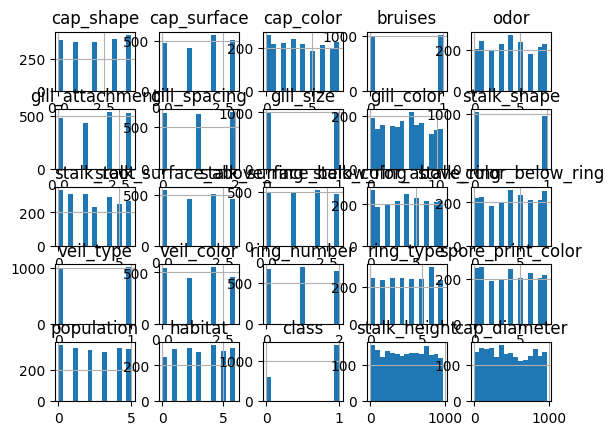

In [ ]:
data.hist(bins = 15)

In [ ]:
data.head()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,916,190
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,128,750
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,537,281
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,234,829
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,895,484


In [ ]:
x = data.drop('class',axis = 1)
y = data['class']

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state =0)

In [ ]:
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

(1600, 24) (400, 24) (1600,) (400,)


In [ ]:
data.corr()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
cap_shape,1.000000,-0.003244,0.009615,-0.001190,-0.030119,0.015477,-0.048783,0.040497,0.032123,0.011573,...,-0.039029,-0.017399,0.036999,0.010172,0.024596,0.003602,0.028388,0.001140,0.023586,0.038942
cap_surface,-0.003244,1.000000,0.003153,-0.021352,-0.021926,-0.010513,0.068918,-0.038490,0.045561,-0.024032,...,-0.068705,0.040341,0.005855,0.017616,-0.042134,-0.003963,-0.038661,-0.046409,0.043168,0.016084
cap_color,0.009615,0.003153,1.000000,0.016445,-0.065410,0.023835,-0.015628,0.009888,-0.005898,-0.020397,...,-0.020039,-0.036166,0.055593,0.021509,0.082155,-0.027551,-0.025568,-0.078029,0.043899,-0.000427
bruises,-0.001190,-0.021352,0.016445,1.000000,0.026274,0.009402,-0.004458,0.041851,-0.035135,0.007928,...,0.016775,-0.053680,-0.022588,-0.028750,-0.026481,0.012976,0.013392,-0.015498,0.066449,-0.045774
odor,-0.030119,-0.021926,-0.065410,0.026274,1.000000,-0.055214,-0.002847,-0.027313,-0.051793,0.009072,...,0.028177,0.015397,-0.068819,0.033956,-0.057705,-0.011753,-0.051237,0.039536,0.012637,-0.054402
gill_attachment,0.015477,-0.010513,0.023835,0.009402,-0.055214,1.000000,-0.063604,0.009386,0.035279,-0.018698,...,-0.042727,-0.023648,0.080437,-0.006025,0.039356,-0.002649,0.005944,-0.028194,-0.015984,-0.041098
gill_spacing,-0.048783,0.068918,-0.015628,-0.004458,-0.002847,-0.063604,1.000000,-0.022650,-0.010729,0.051041,...,-0.016567,0.004960,0.024984,0.001516,0.016376,-0.004920,0.004055,0.046505,0.014766,0.030303
gill_size,0.040497,-0.038490,0.009888,0.041851,-0.027313,0.009386,-0.022650,1.000000,-0.054736,-0.046759,...,-0.029072,-0.016722,-0.005476,-0.028746,0.039395,0.018937,-0.004307,0.019858,-0.001054,-0.068738
gill_color,0.032123,0.045561,-0.005898,-0.035135,-0.051793,0.035279,-0.010729,-0.054736,1.000000,-0.056446,...,-0.029070,-0.026018,-0.029421,0.058992,0.037690,0.034533,0.018815,-0.028083,0.026476,0.004822
stalk_shape,0.011573,-0.024032,-0.020397,0.007928,0.009072,-0.018698,0.051041,-0.046759,-0.056446,1.000000,...,0.004404,-0.051294,0.014983,0.011554,0.027410,-0.000393,-0.054938,0.024023,0.037361,-0.005188


<Axes: >

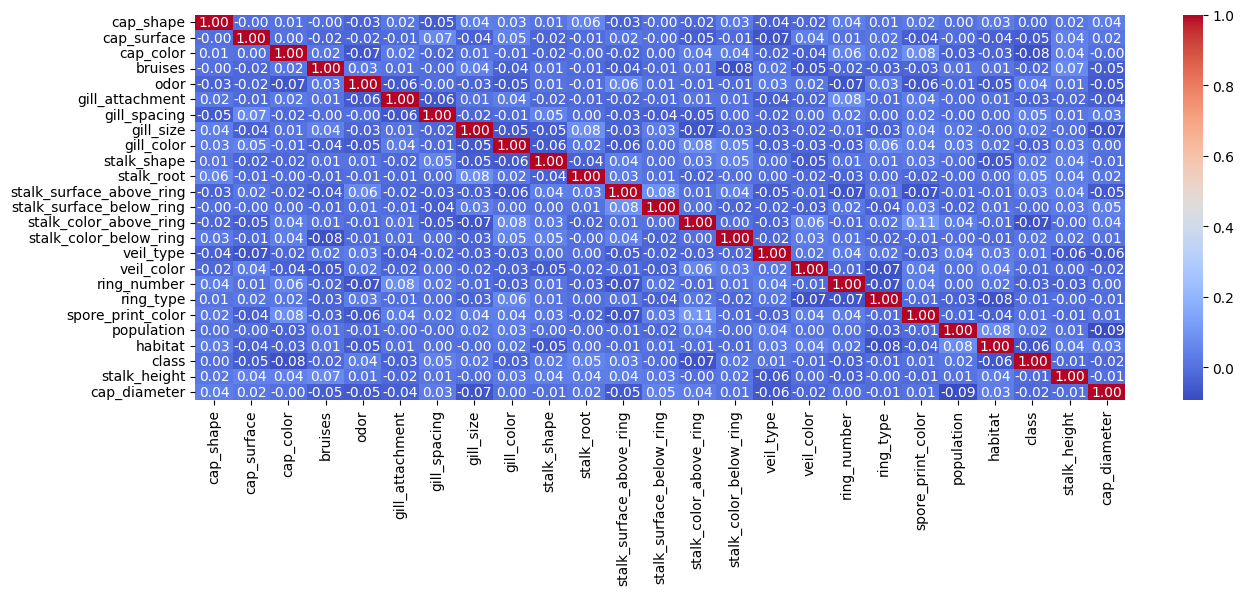

In [ ]:
corr_matrix = data.corr()
plt.figure(figsize = (15,5))
sns.heatmap(corr_matrix,cmap = 'coolwarm',annot = True ,fmt= '.2f',)

Task 6: Parameter Tuning and Optimization
1.Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
clf = SVC()
parameters = [{'kernel':['rbf','sigmoid'],
               'gamma': [200,150,115,110,105,100,50,0.5,0.1,0.01,0.001,0.0001],
               'C':[50,45,30,22,20,17,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0.1,0.01,0.001]
               }]
RSCV = RandomizedSearchCV(clf,parameters)
RSCV.fit(x_train,y_train)

RandomizedSearchCV(estimator=SVC(),
                   param_distributions=[{'C': [50, 45, 30, 22, 20, 17, 15, 14,
                                               13, 12, 11, 10, 9, 8, 7, 6, 5, 4,
                                               3, 2, 1, 0.1, 0.01, 0.001],
                                         'gamma': [200, 150, 115, 110, 105, 100,
                                                   50, 0.5, 0.1, 0.01, 0.001,
                                                   0.0001],
                                         'kernel': ['rbf', 'sigmoid']}])

In [ ]:
RSCV.best_params_ , RSCV.best_score_

({'kernel': 'rbf', 'gamma': 115, 'C': 11}, 0.8568749999999999)

In [ ]:
y_pred = RSCV.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,

In [ ]:
model = SVC(kernel= 'rbf',
            C = 50,
             gamma = 110)
model.fit(x_train,y_train)

SVC(C=50, gamma=110)

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
acc_score = accuracy_score(y_test,y_pred)
print('accuracy_score',acc_score)

prec_score = precision_score(y_test,y_pred )
print('precision_score: ', precision_score)

reca_score = recall_score(y_test, y_pred , average = 'macro')
print('recall_score',reca_score)

f1_score = f1_score(y_test,y_pred,average = 'macro')
print('f1_score',f1_score)

accuracy_score 0.86
precision_score:  <function precision_score at 0x7de697ca30a0>
recall_score 0.7829457364341086
f1_score 0.814563396138945


execution takes more than 1 hour when we goes to linear and polynomial

# conclusion

1. there is no correlation betweeen the features
2. in this svm model i use gridsearchcv for getting best results among the given results
3. the best score is 85%
4. the execution takes more time for fitting the model